In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn import preprocessing

In [3]:
plt.style.use('seaborn')

In [4]:
df=pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\KNN\Breast_Cancer\Breast_cancer_data.csv')

In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.shape

(569, 6)

In [8]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [9]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [10]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

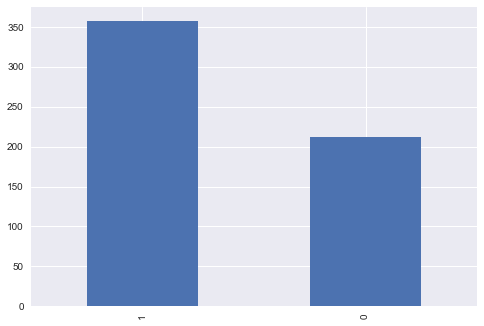

In [11]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.show()

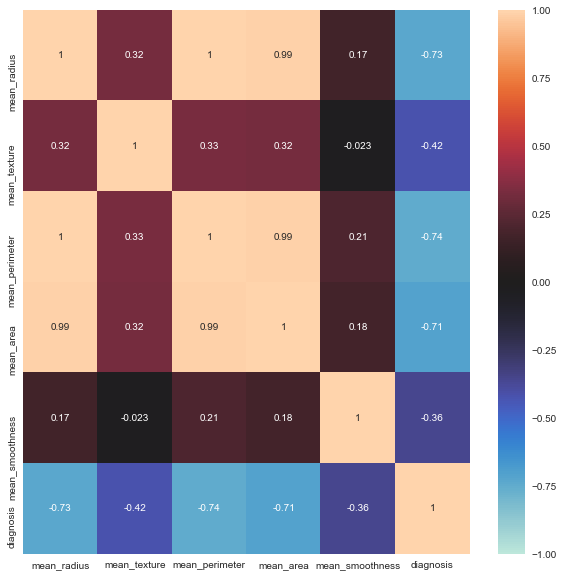

In [12]:
correlation_between_columns = df[df.columns].corr()
upper_triangle_corr = np.triu(correlation_between_columns)

fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(correlation_between_columns, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)
sns.heatmap(correlation_between_columns,annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

In [13]:
# 80% data for training and 20% data for testing
from sklearn.model_selection import train_test_split
Y = df['diagnosis']
X = df.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [14]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# We define the model
knn_model = KNeighborsClassifier(n_neighbors=5)
# We train model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
# We predict target values
Y_predict = knn_model.predict(X_test)

In [17]:
pred_score=knn_model.score(X_test,Y_test)
print(pred_score)

0.8947368421052632


#### Plotting the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

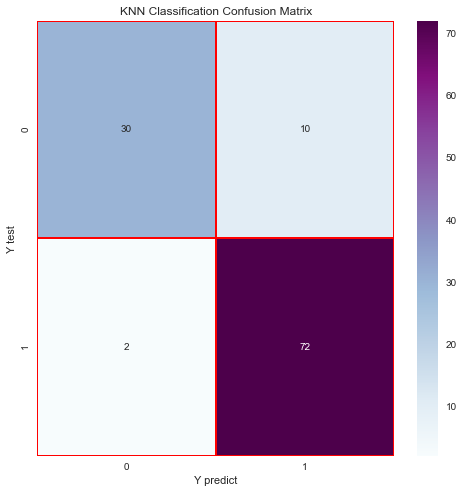

In [19]:
knn_model_cm = confusion_matrix(Y_test, Y_predict)
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(knn_model_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=5)

# train model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=5)

In [21]:
#predict target values
Y_predict = dt_model.predict(X_test)

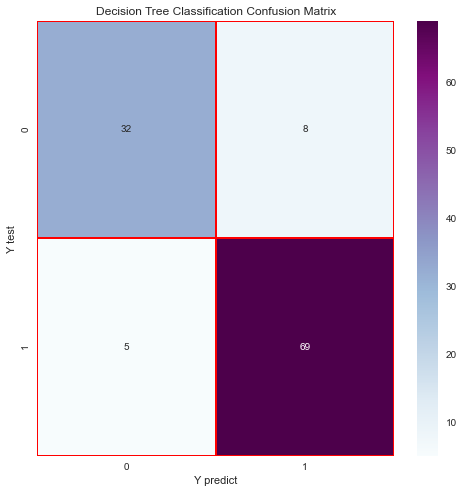

In [22]:
# The confusion matrix
dt_model = confusion_matrix(Y_test, Y_predict)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dt_model, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [23]:
print(type(Y_predict))

<class 'numpy.ndarray'>


In [24]:
Y_test=Y_test.to_numpy()

In [25]:
print(type(Y_test))

<class 'numpy.ndarray'>


In [26]:
pred_score=np.sum(Y_test==Y_predict)/Y_test.shape[0]

In [27]:
print(pred_score)

0.8859649122807017
